<a href="https://colab.research.google.com/github/snwclone/ML_experiments/blob/master/cucumber.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
with open('/content/pictures.csv', 'w') as f:
          f.write('searchterm,exclude\n')
          f.write('cucumber, plant\n')
          f.write('cucumber, salad\n')
          f.write('snake, leather\n')
          f.write('snake, drawing\n')

!cat /content/pictures.csv

searchterm,exclude
cucumber, plant
cucumber, salad
snake, leather


In [0]:
!pip install git+https://github.com/cwerner/fastclass.git#egg=fastclass
  

  Cloning https://github.com/cwerner/fastclass.git to /tmp/pip-install-o5qs3l87/fastclass
  Stored in directory: /tmp/pip-ephem-wheel-cache-eakcqrew/wheels/85/6e/d5/52ccfe3ffa172e009d525d12dd3e6d187e896272b538703cbf
Successfully built fastclass


In [0]:
!fcd -m 80 -s 224 -o /content/dataset/train /content/pictures.csv


INFO: final dataset will be located in /content/dataset/train
[1/3] Searching: >> cucumber <<
(1) Crawling ...
    -> GOOGLE
    -> BING
Number of duplicate image files: 8. Removing...
(2) Resizing images to (224, 224)
100% 155/155 [00:03<00:00, 41.65it/s]
[2/3] Searching: >> cucumber <<
(1) Crawling ...
    -> GOOGLE
    -> BING
Number of duplicate image files: 87. Removing...
(2) Resizing images to (224, 224)
100% 232/232 [00:05<00:00, 39.61it/s]
[3/3] Searching: >> snake <<
(1) Crawling ...
    -> GOOGLE
    -> BING
Number of duplicate image files: 1. Removing...
(2) Resizing images to (224, 224)
100% 143/143 [00:03<00:00, 42.43it/s]


In [0]:
!mkdir /content/dataset/test/
!mkdir /content/dataset/test/cucumber/
!mv /content/dataset/train/cucumber/*1.jpg /content/dataset/test/cucumber

!mkdir /content/dataset/test/snake/
!mv /content/dataset/train/snake/*1.jpg /content/dataset/test/snake


In [0]:

%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.vision import *
from fastai.metrics import error_rate

bs = 32



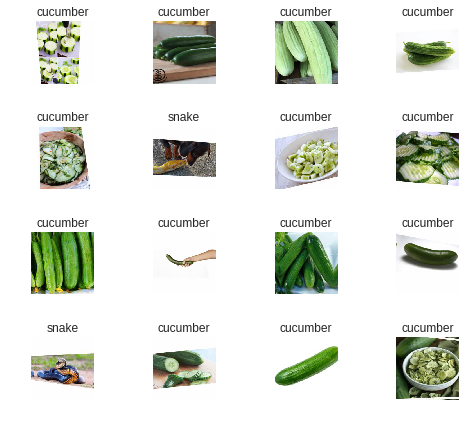

In [0]:
data = ImageDataBunch.from_folder("/content/dataset", valid_pct = 0.2, ds_tfms=get_transforms(), size=224, bs=bs).normalize(imagenet_stats)
data.show_batch(rows=4, figsize=(7,6))

In [0]:

learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
87306240it [00:01, 56123125.12it/s]


In [0]:

learn.fit_one_cycle(4)


epoch,train_loss,valid_loss,error_rate,time
0,0.214161,0.053705,0.025641,14:55
1,0.152715,0.056719,0.020147,15:01
2,0.100051,0.048656,0.018315,15:01
3,0.076206,0.057856,0.020147,14:56


In [0]:
learn.load("/content/stage1_model")

interp = ClassificationInterpretation.from_learner(learn, ds_type='test')

losses,idxs = interp.top_losses()

losses

tensor([1.4510e+00, 1.4510e+00, 1.5128e-01, 1.5128e-01, 9.6150e-02, 9.1206e-02,
        5.7013e-02, 4.1248e-02, 4.1248e-02, 3.7870e-02, 3.7870e-02, 3.2609e-02,
        3.0659e-02, 3.0659e-02, 2.6204e-02, 2.1372e-02, 2.1323e-02, 1.6863e-02,
        1.4539e-02, 1.4192e-02, 1.2846e-02, 1.2777e-02, 1.2695e-02, 1.1905e-02,
        1.0256e-02, 1.0256e-02, 9.8360e-03, 9.5057e-03, 9.5057e-03, 8.5759e-03,
        8.3280e-03, 8.3232e-03, 8.2269e-03, 6.9389e-03, 6.3994e-03, 5.7335e-03,
        5.6591e-03, 5.2454e-03, 4.8361e-03, 4.6203e-03, 4.6203e-03, 4.4188e-03,
        4.1993e-03, 4.1993e-03, 3.9449e-03, 3.9079e-03, 3.8676e-03, 3.5973e-03,
        3.5973e-03, 3.5882e-03, 3.5489e-03, 3.3333e-03, 3.3312e-03, 3.2232e-03,
        3.1700e-03, 3.0475e-03, 3.0215e-03, 2.9359e-03, 2.8186e-03, 2.7537e-03,
        2.7003e-03, 2.6026e-03, 2.1238e-03, 2.0175e-03, 2.0049e-03, 1.9586e-03,
        1.9462e-03, 1.8954e-03, 1.8108e-03, 1.7183e-03, 1.7183e-03, 1.7183e-03,
        1.5993e-03, 1.5354e-03, 1.5297e-

In [0]:
ClassificationInterpretation??


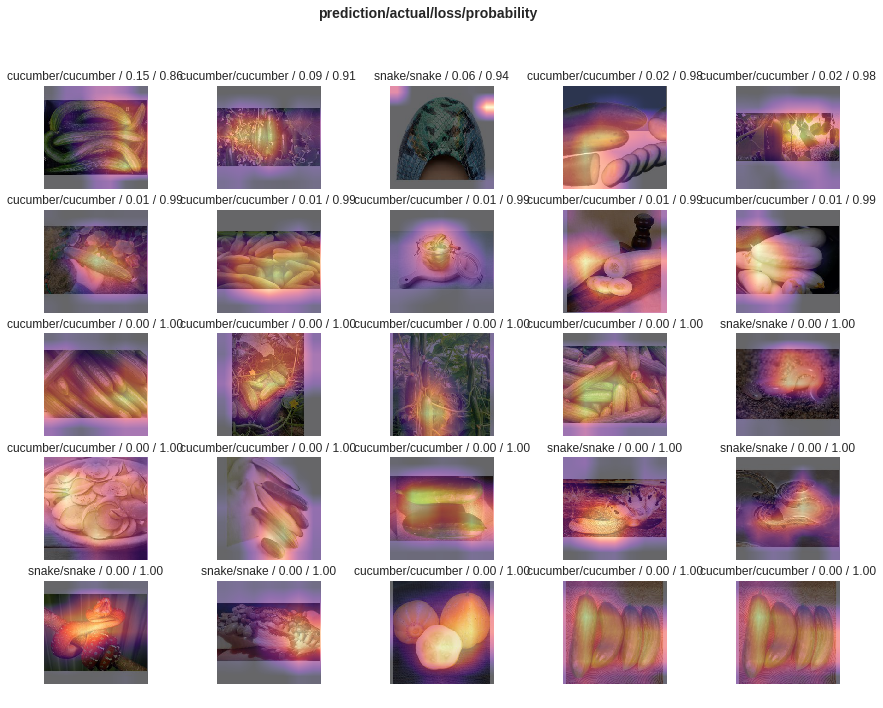

In [0]:
interp.plot_top_losses(25, figsize=(15,11))


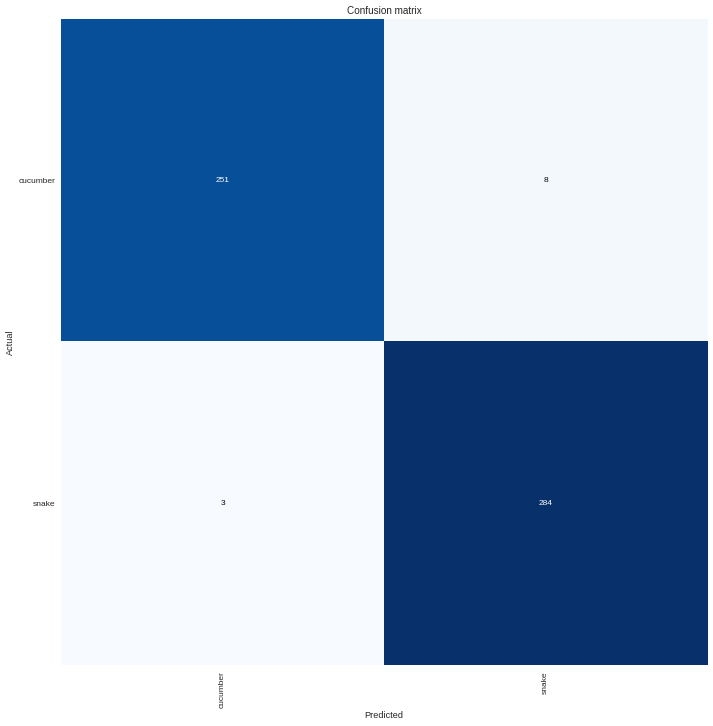

In [0]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)


Category cucumber

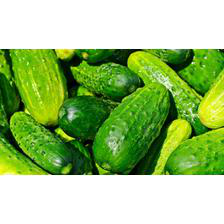

In [0]:
img = open_image("/content/dataset/test/cucumber/000031.jpg")


pred_class,pred_idx,outputs = learn.predict(img)
display(pred_class)
img